# Diabetes Data Analysis

This notebook will analyse and clean the Pima Indians Diabetes Data for best usage in the algorithms comparison. The data was extracted from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) which we can also find some data information:

    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Now let's analyze, visualize and clean it.

## Dependencies

In [2]:
import os
import sys
path = os.getcwd().split('tests')[0]
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss
sns.set_style('darkgrid')


## Get Data

In [7]:
df = pd.read_csv(path+'data/raw/pima-indians-diabetes.csv',names=['Pregnance','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree','Age','target'])

In [9]:
df.head()

,Pregnance,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### How many samples and attributes?

In [10]:
print("Samples: {}".format(df.shape[0]))
print("Attributes: {}".format(df.shape[1]))

Samples: 768
Attributes: 9


### Dataset Information!

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnance           768 non-null int64
Glucose             768 non-null int64
BloodPressure       768 non-null int64
SkinThickness       768 non-null int64
Insulin             768 non-null int64
BMI                 768 non-null float64
DiabetesPedigree    768 non-null float64
Age                 768 non-null int64
target              768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


So, beyond the `target`, we have 6 integer columns and 2 that are float. And apparently, we don't have null values.

### Dataset Description

In [46]:
df.describe()

,Pregnance,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


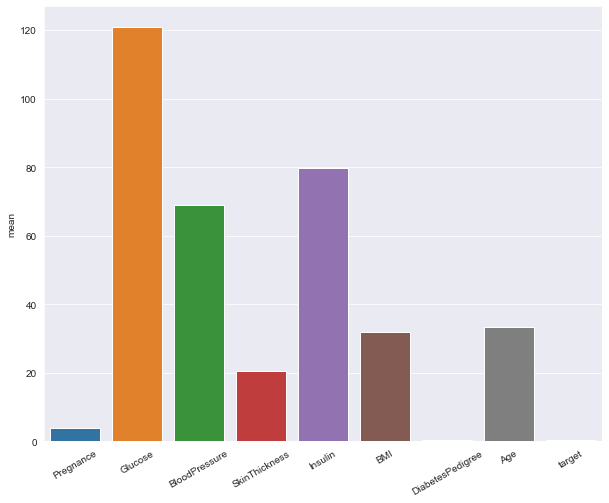

In [47]:
df_mean = pd.DataFrame(df.mean(),columns=['mean'])
plt.figure(figsize=(10,8))
ax = sns.barplot(data=df_mean,x=df_mean.index,y='mean')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

The data clearly must be **standarlized**, and we can see that for the `Pregnance`,`Glucose`,`BloodPressure`,`SkinThickness`,`Insulin` and `BMI` the minimum values are 0, which doesn't make sense for these attributes, so probabliy the missing values are dealt as zeros not as NaN.

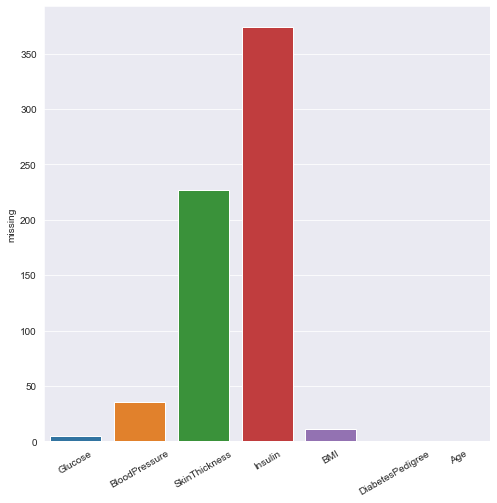

In [64]:
df_miss = df.iloc[:,1:-1].replace(0,np.nan)
df_missing = df_miss.isnull().sum()
df_missing = pd.DataFrame(df_missing,columns=['missing'])
df_missing
plt.figure(figsize=(8,8))
ax = sns.barplot(data=df_missing,x=df_missing.index,y='missing')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

So, for `Insulin` and `SkinThickness` there are a lot of null values.

### Duplicates?

In [74]:
df.duplicated().value_counts()

False    768
dtype: int64

Cool! There are no duplicated!

## Values of the Integer Attributes

In [75]:
df_int = df.select_dtypes('int64')

In [76]:
df_int.head()

,Pregnance,Glucose,BloodPressure,SkinThickness,Insulin,Age,target
0,6,148,72,35,0,50,1
1,1,85,66,29,0,31,0
2,8,183,64,0,0,32,1
3,1,89,66,23,94,21,0
4,0,137,40,35,168,33,1


In [77]:
for i in range(df_int.columns.values[:-1].size):
    print("{} unique: {}".format(df_int.columns.values[i],df_int[df_int.columns.values[i]].value_counts().count()))


Pregnance unique: 17
Glucose unique: 136
BloodPressure unique: 47
SkinThickness unique: 51
Insulin unique: 186
Age unique: 52


### Classes Proportion

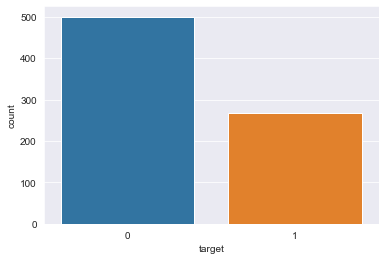

In [78]:
sns.countplot(data=df, x='target')

In [79]:
df['target'].value_counts()*100/df.shape[0]

0    65.104167
1    34.895833
Name: target, dtype: float64

The classes are imbalanced, almost  a proportion of 2:1

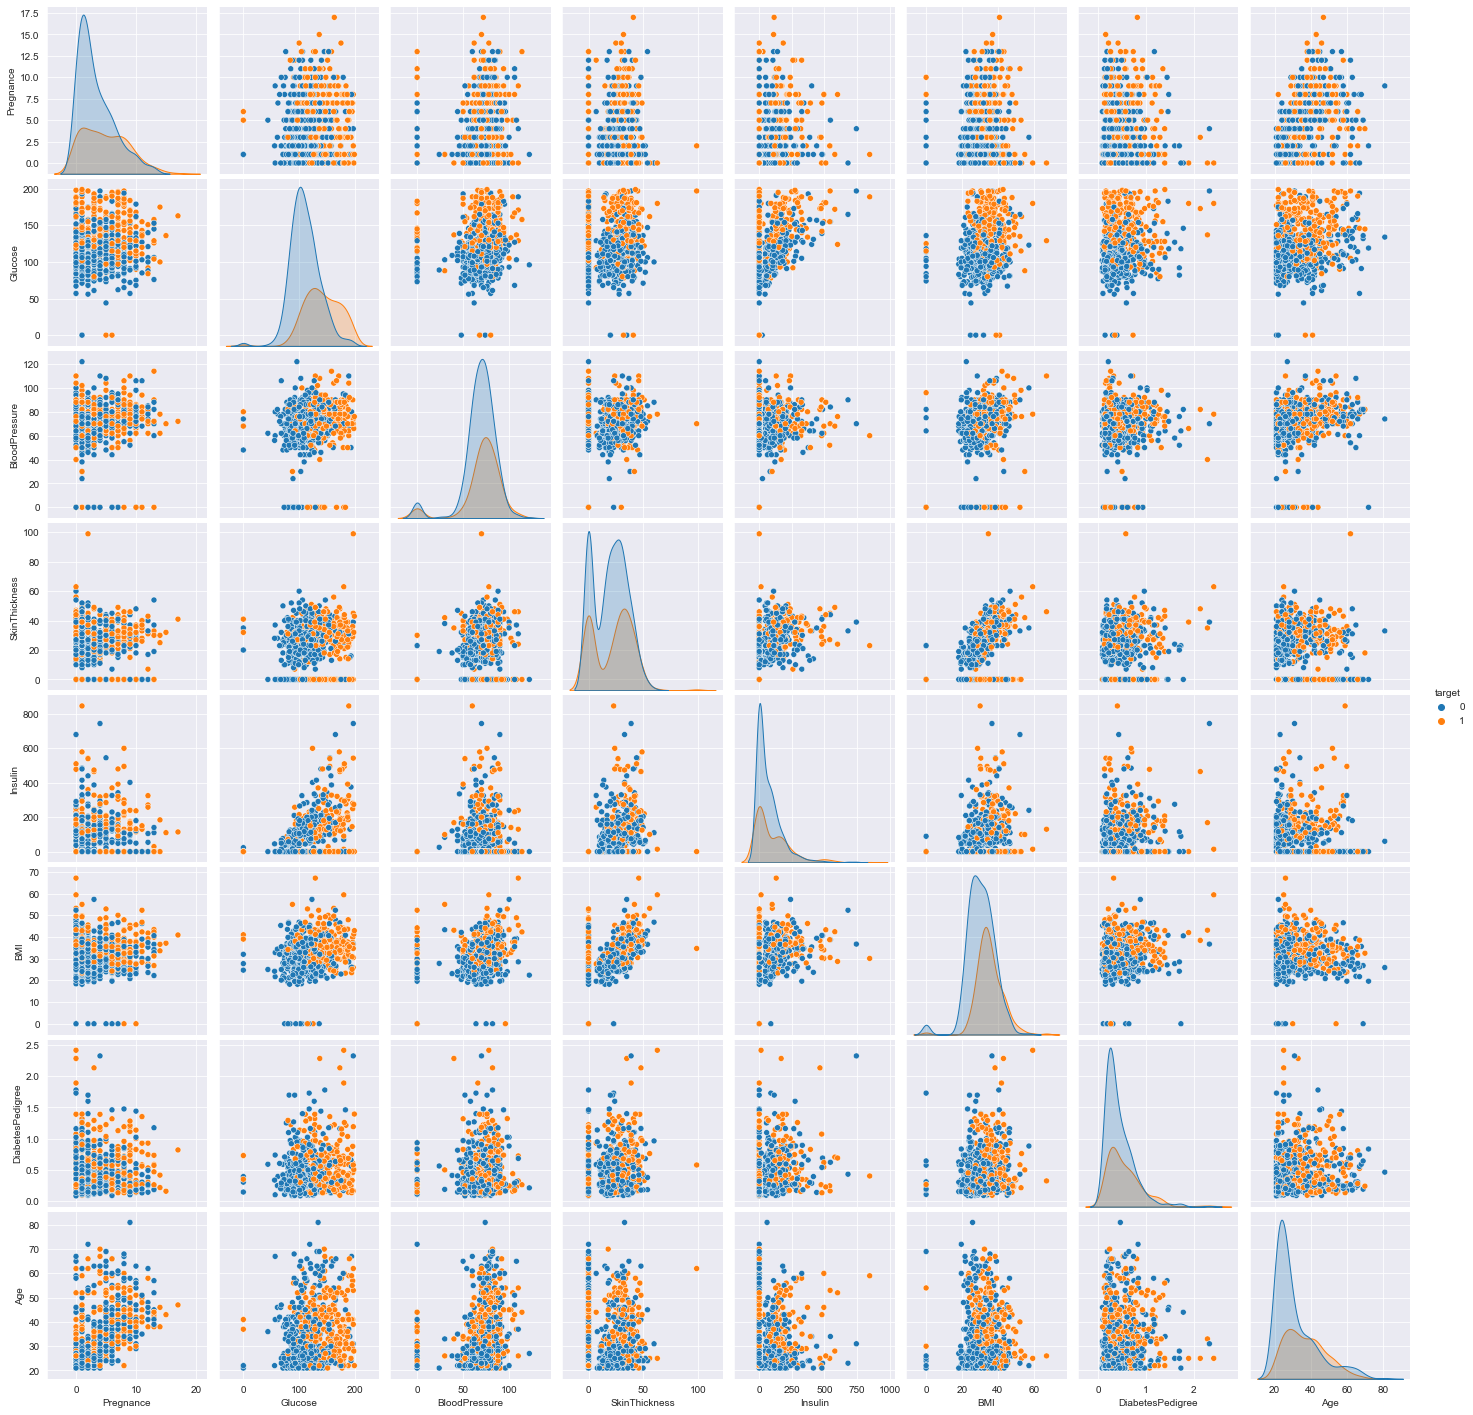

In [80]:
sns.pairplot(data=df, hue='target',diag_kind='kde')